1. ค่ากลาง (Mean, Median, Mode)


In [1]:
import pandas as pd
import numpy as np

# สร้าง DataFrame ตัวอย่าง
data = {
    'Scores': [85, 90, 78, 92, 88, 76, 95, 89, 84, 91]
}
df = pd.DataFrame(data)

# 1. Mean (ค่าเฉลี่ย)
mean_value = df['Scores'].mean()
print(f"Mean: {mean_value}")


Mean: 86.8


In [2]:

# 2. Median (มัธยฐาน)
median_value = df['Scores'].median()
print(f"Median: {median_value}")


Median: 88.5


In [3]:

# 3. Mode (ฐานนิยม)
mode_value = df['Scores'].mode()[0]
print(f"Mode: {mode_value}")


Mode: 76


In [4]:

# 4. Range (พิสัย)
range_value = df['Scores'].max() - df['Scores'].min()
print(f"Range: {range_value}")



Range: 19


In [5]:
# 5. Variance (ความแปรปรวน)
variance_value = df['Scores'].var()
print(f"Variance: {variance_value}")



Variance: 37.06666666666668


In [6]:
# 6. Standard Deviation (ส่วนเบี่ยงเบนมาตรฐาน)
std_deviation_value = df['Scores'].std()
print(f"Standard Deviation: {std_deviation_value}")



Standard Deviation: 6.0882400303098


In [7]:
# 7. Interquartile Range (IQR)
q1 = df['Scores'].quantile(0.25)
q3 = df['Scores'].quantile(0.75)
iqr = q3 - q1
print(f"Interquartile Range (IQR): {iqr}")



Interquartile Range (IQR): 6.5


In [8]:
# 8. Skewness (การเบ้)
skewness = df['Scores'].skew()
print(f"Skewness: {skewness}")



Skewness: -0.712542454766213


In [9]:
# 9. Kurtosis (ความสูงของการแจกแจง)
kurtosis = df['Scores'].kurt()
print(f"Kurtosis: {kurtosis}")



Kurtosis: -0.30955169061051535


In [10]:
# 10. Z-Score ของข้อมูลแต่ละจุด
z_scores = (df['Scores'] - mean_value) / std_deviation_value
df['Z-Score'] = z_scores
print("\nZ-Scores:")
print(df)



Z-Scores:
   Scores   Z-Score
0      85 -0.295652
1      90  0.525603
2      78 -1.445410
3      92  0.854106
4      88  0.197101
5      76 -1.773912
6      95  1.346859
7      89  0.361352
8      84 -0.459903
9      91  0.689855


In [11]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# ข้อมูลตัวอย่างเกี่ยวกับราคาบ้าน
data = {
    'พื้นที่บ้าน (ตร.ม.)': [100, 150, 200, 250, 300],
    'จำนวนห้องนอน': [2, 3, 4, 3, 5],
    'อายุของบ้าน (ปี)': [10, 5, 20, 15, 30]
}
df = pd.DataFrame(data)

# แสดงข้อมูลก่อนทำ Normalization
print("ข้อมูลก่อนทำ Normalization:")
print(df)

# สร้าง MinMaxScaler
scaler = MinMaxScaler()

# ทำการ Normalization ข้อมูล
df_normalized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# แสดงข้อมูลหลังทำ Normalization
print("\nข้อมูลหลังทำ Normalization:")
print(df_normalized)


ข้อมูลก่อนทำ Normalization:
   พื้นที่บ้าน (ตร.ม.)  จำนวนห้องนอน  อายุของบ้าน (ปี)
0                  100             2                10
1                  150             3                 5
2                  200             4                20
3                  250             3                15
4                  300             5                30

ข้อมูลหลังทำ Normalization:
   พื้นที่บ้าน (ตร.ม.)  จำนวนห้องนอน  อายุของบ้าน (ปี)
0                 0.00      0.000000               0.2
1                 0.25      0.333333               0.0
2                 0.50      0.666667               0.6
3                 0.75      0.333333               0.4
4                 1.00      1.000000               1.0


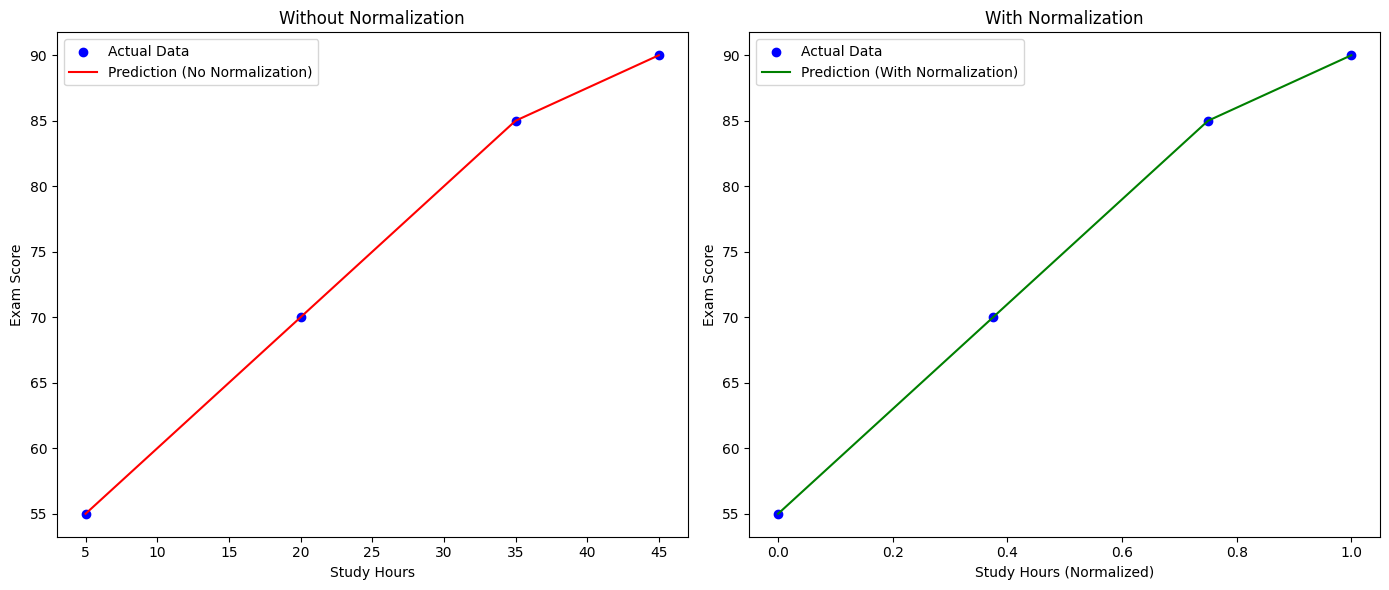

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

# Create sample data
data = {
    'Study Hours': [5, 20, 35, 45],
    'Age': [15, 16, 17, 18],
    'Exam Score': [55, 70, 85, 90]
}
df = pd.DataFrame(data)

# Linear Regression model for the case without Normalization
model_no_norm = LinearRegression()
model_no_norm.fit(df[['Study Hours', 'Age']], df['Exam Score'])
predicted_no_norm = model_no_norm.predict(df[['Study Hours', 'Age']])

# Apply Normalization
scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df[['Study Hours', 'Age']]),
                             columns=['Study Hours', 'Age'])

# Linear Regression model for the case with Normalization
model_norm = LinearRegression()
model_norm.fit(df_normalized, df['Exam Score'])
predicted_norm = model_norm.predict(df_normalized)

# Plot comparison
plt.figure(figsize=(14, 6))

# Plot for the case without Normalization
plt.subplot(1, 2, 1)
plt.scatter(df['Study Hours'], df['Exam Score'], color='blue', label='Actual Data')
plt.plot(df['Study Hours'], predicted_no_norm, color='red', label='Prediction (No Normalization)')
plt.xlabel('Study Hours')
plt.ylabel('Exam Score')
plt.title('Without Normalization')
plt.legend()

# Plot for the case with Normalization
plt.subplot(1, 2, 2)
plt.scatter(df_normalized['Study Hours'], df['Exam Score'], color='blue', label='Actual Data')
plt.plot(df_normalized['Study Hours'], predicted_norm, color='green', label='Prediction (With Normalization)')
plt.xlabel('Study Hours (Normalized)')
plt.ylabel('Exam Score')
plt.title('With Normalization')
plt.legend()

plt.tight_layout()
plt.show()


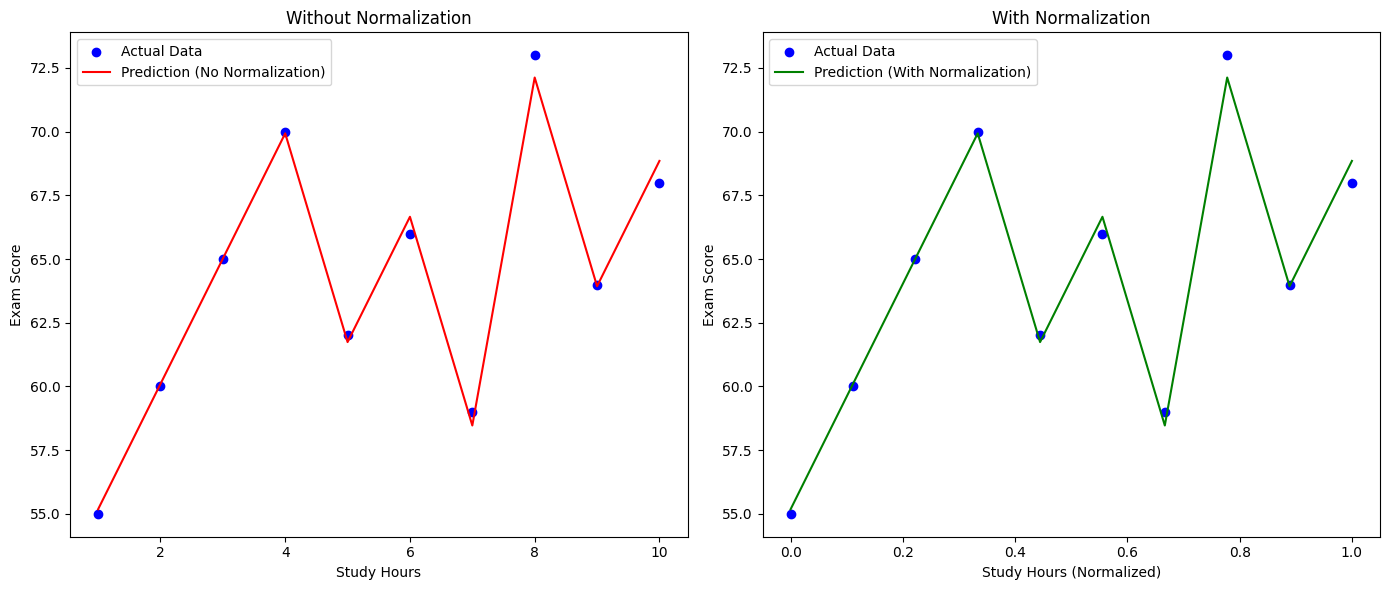

Coefficients without Normalization: [0.54814815 4.37037037]
Coefficients with Normalization: [ 4.93333333 13.11111111]


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

# สร้างข้อมูลตัวอย่าง
data = {
    'Study Hours': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],   # จำนวนชั่วโมงการอ่านหนังสือ
    'Age': [15, 16, 17, 18, 16, 17, 15, 18, 16, 17], # อายุของนักเรียน
    'Exam Score': [55, 60, 65, 70, 62, 66, 59, 73, 64, 68] # คะแนนสอบ
}
df = pd.DataFrame(data)

# แบ่งข้อมูลเป็นฟีเจอร์และตัวแปรเป้าหมาย
X = df[['Study Hours', 'Age']]
y = df['Exam Score']

# โมเดล Linear Regression สำหรับกรณีไม่ทำ Normalization
model_no_norm = LinearRegression()
model_no_norm.fit(X, y)
predicted_no_norm = model_no_norm.predict(X)

# ทำ Normalization ข้อมูล
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# โมเดล Linear Regression สำหรับกรณีทำ Normalization
model_norm = LinearRegression()
model_norm.fit(X_normalized, y)
predicted_norm = model_norm.predict(X_normalized)

# สร้างกราฟเปรียบเทียบ
plt.figure(figsize=(14, 6))

# กราฟสำหรับไม่ทำ Normalization
plt.subplot(1, 2, 1)
plt.scatter(df['Study Hours'], y, color='blue', label='Actual Data')
plt.plot(df['Study Hours'], predicted_no_norm, color='red', label='Prediction (No Normalization)')
plt.xlabel('Study Hours')
plt.ylabel('Exam Score')
plt.title('Without Normalization')
plt.legend()

# กราฟสำหรับทำ Normalization
plt.subplot(1, 2, 2)
plt.scatter(X_normalized[:, 0], y, color='blue', label='Actual Data')
plt.plot(X_normalized[:, 0], predicted_norm, color='green', label='Prediction (With Normalization)')
plt.xlabel('Study Hours (Normalized)')
plt.ylabel('Exam Score')
plt.title('With Normalization')
plt.legend()

plt.tight_layout()
plt.show()

# แสดงค่าสัมประสิทธิ์ของโมเดล
print("Coefficients without Normalization:", model_no_norm.coef_)
print("Coefficients with Normalization:", model_norm.coef_)


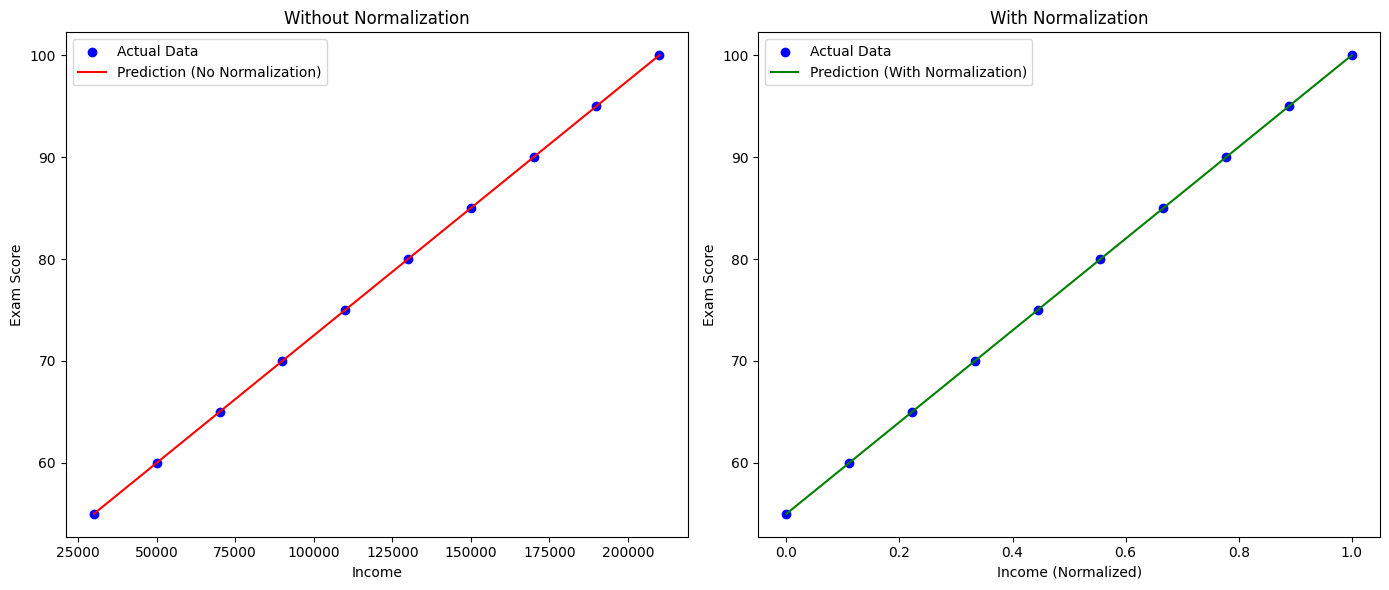

Coefficients without Normalization: [2.49999999e-04 1.25000000e-08]
Coefficients with Normalization: [22.5 22.5]


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

# สร้างข้อมูลตัวอย่าง
data = {
    'Income': [30000, 50000, 70000, 90000, 110000, 130000, 150000, 170000, 190000, 210000], # รายได้
    'Age': [18, 19, 20, 21, 22, 23, 24, 25, 26, 27],  # อายุ
    'Exam Score': [55, 60, 65, 70, 75, 80, 85, 90, 95, 100] # คะแนนสอบ
}
df = pd.DataFrame(data)

# แบ่งข้อมูลเป็นฟีเจอร์และตัวแปรเป้าหมาย
X = df[['Income', 'Age']]
y = df['Exam Score']

# โมเดล Linear Regression สำหรับกรณีไม่ทำ Normalization
model_no_norm = LinearRegression()
model_no_norm.fit(X, y)
predicted_no_norm = model_no_norm.predict(X)

# ทำ Normalization ข้อมูล
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# โมเดล Linear Regression สำหรับกรณีทำ Normalization
model_norm = LinearRegression()
model_norm.fit(X_normalized, y)
predicted_norm = model_norm.predict(X_normalized)

# สร้างกราฟเปรียบเทียบ
plt.figure(figsize=(14, 6))

# กราฟสำหรับไม่ทำ Normalization
plt.subplot(1, 2, 1)
plt.scatter(df['Income'], y, color='blue', label='Actual Data')
plt.plot(df['Income'], predicted_no_norm, color='red', label='Prediction (No Normalization)')
plt.xlabel('Income')
plt.ylabel('Exam Score')
plt.title('Without Normalization')
plt.legend()

# กราฟสำหรับทำ Normalization
plt.subplot(1, 2, 2)
plt.scatter(X_normalized[:, 0], y, color='blue', label='Actual Data')
plt.plot(X_normalized[:, 0], predicted_norm, color='green', label='Prediction (With Normalization)')
plt.xlabel('Income (Normalized)')
plt.ylabel('Exam Score')
plt.title('With Normalization')
plt.legend()

plt.tight_layout()
plt.show()

# แสดงค่าสัมประสิทธิ์ของโมเดล
print("Coefficients without Normalization:", model_no_norm.coef_)
print("Coefficients with Normalization:", model_norm.coef_)


Mean Squared Error (Without Normalization): 0.00
Mean Squared Error (With Normalization): 0.00


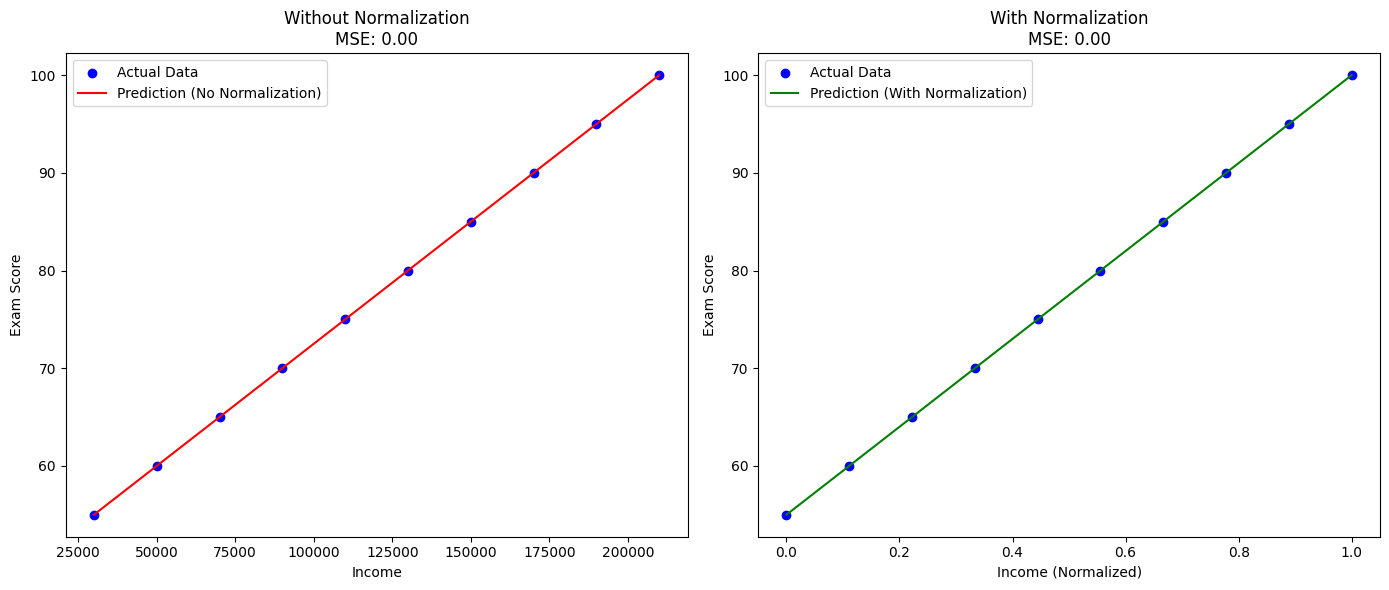

Coefficients without Normalization: [2.49999999e-04 1.25000000e-08]
Coefficients with Normalization: [22.5 22.5]


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# สร้างข้อมูลตัวอย่าง
data = {
    'Income': [30000, 50000, 70000, 90000, 110000, 130000, 150000, 170000, 190000, 210000], # รายได้
    'Age': [18, 19, 20, 21, 22, 23, 24, 25, 26, 27],  # อายุ
    'Exam Score': [55, 60, 65, 70, 75, 80, 85, 90, 95, 100] # คะแนนสอบ
}
df = pd.DataFrame(data)

# แบ่งข้อมูลเป็นฟีเจอร์และตัวแปรเป้าหมาย
X = df[['Income', 'Age']]
y = df['Exam Score']

# โมเดล Linear Regression สำหรับกรณีไม่ทำ Normalization
model_no_norm = LinearRegression()
model_no_norm.fit(X, y)
predicted_no_norm = model_no_norm.predict(X)

# ทำ Normalization ข้อมูล
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# โมเดล Linear Regression สำหรับกรณีทำ Normalization
model_norm = LinearRegression()
model_norm.fit(X_normalized, y)
predicted_norm = model_norm.predict(X_normalized)

# คำนวณ Mean Squared Error (MSE) สำหรับทั้งสองกรณี
mse_no_norm = mean_squared_error(y, predicted_no_norm)
mse_norm = mean_squared_error(y, predicted_norm)

# แสดงผลการเปรียบเทียบ MSE
print(f'Mean Squared Error (Without Normalization): {mse_no_norm:.2f}')
print(f'Mean Squared Error (With Normalization): {mse_norm:.2f}')

# สร้างกราฟเปรียบเทียบ
plt.figure(figsize=(14, 6))

# กราฟสำหรับไม่ทำ Normalization
plt.subplot(1, 2, 1)
plt.scatter(df['Income'], y, color='blue', label='Actual Data')
plt.plot(df['Income'], predicted_no_norm, color='red', label='Prediction (No Normalization)')
plt.xlabel('Income')
plt.ylabel('Exam Score')
plt.title(f'Without Normalization\nMSE: {mse_no_norm:.2f}')
plt.legend()

# กราฟสำหรับทำ Normalization
plt.subplot(1, 2, 2)
plt.scatter(X_normalized[:, 0], y, color='blue', label='Actual Data')
plt.plot(X_normalized[:, 0], predicted_norm, color='green', label='Prediction (With Normalization)')
plt.xlabel('Income (Normalized)')
plt.ylabel('Exam Score')
plt.title(f'With Normalization\nMSE: {mse_norm:.2f}')
plt.legend()

plt.tight_layout()
plt.show()

# แสดงค่าสัมประสิทธิ์ของโมเดล
print("Coefficients without Normalization:", model_no_norm.coef_)
print("Coefficients with Normalization:", model_norm.coef_)


Mean Squared Error (Without Normalization): 11.75
Mean Squared Error (With Normalization): 11.75


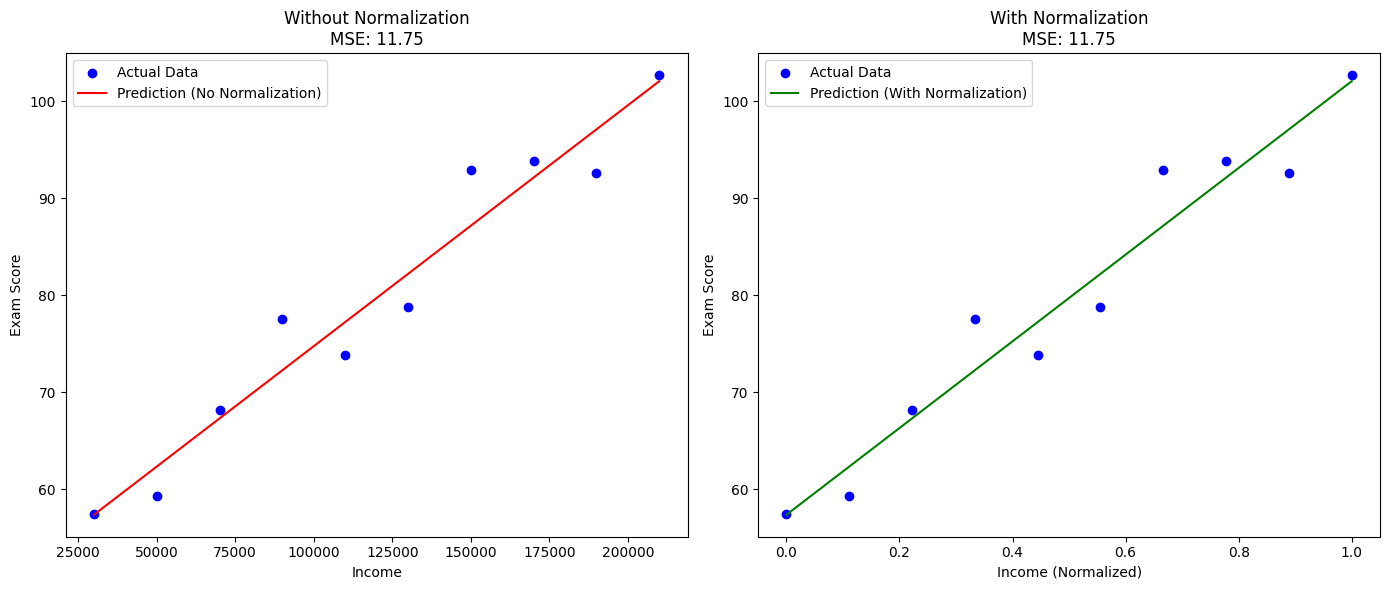

Coefficients without Normalization: [2.48274906e-04 1.24137453e-08]
Coefficients with Normalization: [22.34474164 22.34474164]


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# สร้างข้อมูลตัวอย่างโดยเพิ่ม Noise
np.random.seed(42) # เพื่อให้ผลลัพธ์ซ้ำได้
data = {
    'Income': [30000, 50000, 70000, 90000, 110000, 130000, 150000, 170000, 190000, 210000], # รายได้
    'Age': [18, 19, 20, 21, 22, 23, 24, 25, 26, 27],  # อายุ
    'Exam Score': [55, 60, 65, 70, 75, 80, 85, 90, 95, 100] + np.random.normal(0, 5, 10) # เพิ่ม Noise
}
df = pd.DataFrame(data)

# แบ่งข้อมูลเป็นฟีเจอร์และตัวแปรเป้าหมาย
X = df[['Income', 'Age']]
y = df['Exam Score']

# โมเดล Linear Regression สำหรับกรณีไม่ทำ Normalization
model_no_norm = LinearRegression()
model_no_norm.fit(X, y)
predicted_no_norm = model_no_norm.predict(X)

# ทำ Normalization ข้อมูล
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# โมเดล Linear Regression สำหรับกรณีทำ Normalization
model_norm = LinearRegression()
model_norm.fit(X_normalized, y)
predicted_norm = model_norm.predict(X_normalized)

# คำนวณ Mean Squared Error (MSE) สำหรับทั้งสองกรณี
mse_no_norm = mean_squared_error(y, predicted_no_norm)
mse_norm = mean_squared_error(y, predicted_norm)

# แสดงผลการเปรียบเทียบ MSE
print(f'Mean Squared Error (Without Normalization): {mse_no_norm:.2f}')
print(f'Mean Squared Error (With Normalization): {mse_norm:.2f}')

# สร้างกราฟเปรียบเทียบ
plt.figure(figsize=(14, 6))

# กราฟสำหรับไม่ทำ Normalization
plt.subplot(1, 2, 1)
plt.scatter(df['Income'], y, color='blue', label='Actual Data')
plt.plot(df['Income'], predicted_no_norm, color='red', label='Prediction (No Normalization)')
plt.xlabel('Income')
plt.ylabel('Exam Score')
plt.title(f'Without Normalization\nMSE: {mse_no_norm:.2f}')
plt.legend()

# กราฟสำหรับทำ Normalization
plt.subplot(1, 2, 2)
plt.scatter(X_normalized[:, 0], y, color='blue', label='Actual Data')
plt.plot(X_normalized[:, 0], predicted_norm, color='green', label='Prediction (With Normalization)')
plt.xlabel('Income (Normalized)')
plt.ylabel('Exam Score')
plt.title(f'With Normalization\nMSE: {mse_norm:.2f}')
plt.legend()

plt.tight_layout()
plt.show()

# แสดงค่าสัมประสิทธิ์ของโมเดล
print("Coefficients without Normalization:", model_no_norm.coef_)
print("Coefficients with Normalization:", model_norm.coef_)


Mean Squared Error (Without Normalization): 94.17
Mean Squared Error (With Normalization): 94.17


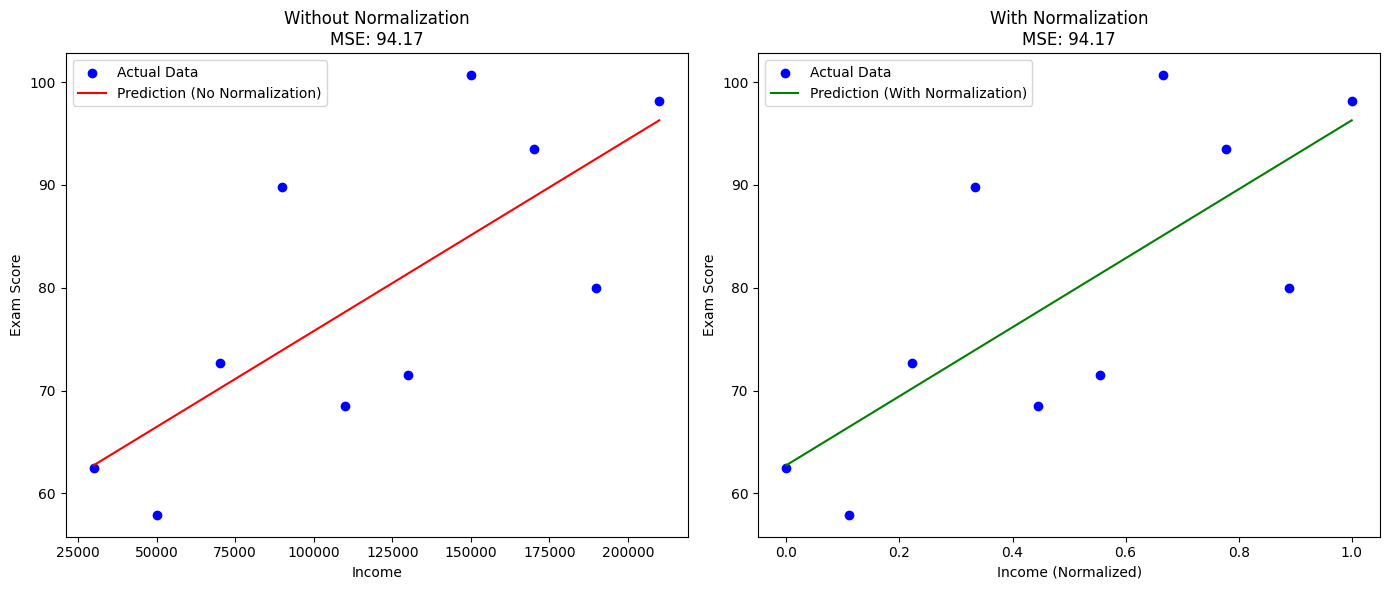

Coefficients without Normalization: [1.86339872e-04 9.31699361e-09]
Coefficients with Normalization: [16.77058855 16.77058855]


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# สร้างข้อมูลตัวอย่างที่มี Noise เพิ่มมากขึ้น
np.random.seed(42)
data = {
    'Income': [30000, 50000, 70000, 90000, 110000, 130000, 150000, 170000, 190000, 210000], # รายได้
    'Age': [18, 19, 20, 21, 22, 23, 24, 25, 26, 27],  # อายุ
    'Exam Score': [55, 60, 63, 67, 72, 75, 77, 82, 87, 90] + np.random.normal(0, 15, 10) # เพิ่ม Noise
}
df = pd.DataFrame(data)

# แบ่งข้อมูลเป็นฟีเจอร์และตัวแปรเป้าหมาย
X = df[['Income', 'Age']]
y = df['Exam Score']

# โมเดล Linear Regression สำหรับกรณีไม่ทำ Normalization
model_no_norm = LinearRegression()
model_no_norm.fit(X, y)
predicted_no_norm = model_no_norm.predict(X)

# ทำ Normalization ข้อมูล
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# โมเดล Linear Regression สำหรับกรณีทำ Normalization
model_norm = LinearRegression()
model_norm.fit(X_normalized, y)
predicted_norm = model_norm.predict(X_normalized)

# คำนวณ Mean Squared Error (MSE) สำหรับทั้งสองกรณี
mse_no_norm = mean_squared_error(y, predicted_no_norm)
mse_norm = mean_squared_error(y, predicted_norm)

# แสดงผลการเปรียบเทียบ MSE
print(f'Mean Squared Error (Without Normalization): {mse_no_norm:.2f}')
print(f'Mean Squared Error (With Normalization): {mse_norm:.2f}')

# สร้างกราฟเปรียบเทียบ
plt.figure(figsize=(14, 6))

# กราฟสำหรับไม่ทำ Normalization
plt.subplot(1, 2, 1)
plt.scatter(df['Income'], y, color='blue', label='Actual Data')
plt.plot(df['Income'], predicted_no_norm, color='red', label='Prediction (No Normalization)')
plt.xlabel('Income')
plt.ylabel('Exam Score')
plt.title(f'Without Normalization\nMSE: {mse_no_norm:.2f}')
plt.legend()

# กราฟสำหรับทำ Normalization
plt.subplot(1, 2, 2)
plt.scatter(X_normalized[:, 0], y, color='blue', label='Actual Data')
plt.plot(X_normalized[:, 0], predicted_norm, color='green', label='Prediction (With Normalization)')
plt.xlabel('Income (Normalized)')
plt.ylabel('Exam Score')
plt.title(f'With Normalization\nMSE: {mse_norm:.2f}')
plt.legend()

plt.tight_layout()
plt.show()

# แสดงค่าสัมประสิทธิ์ของโมเดล
print("Coefficients without Normalization:", model_no_norm.coef_)
print("Coefficients with Normalization:", model_norm.coef_)


Mean Squared Error (Without Normalization): 486.33
Mean Squared Error (With Normalization): 295.53


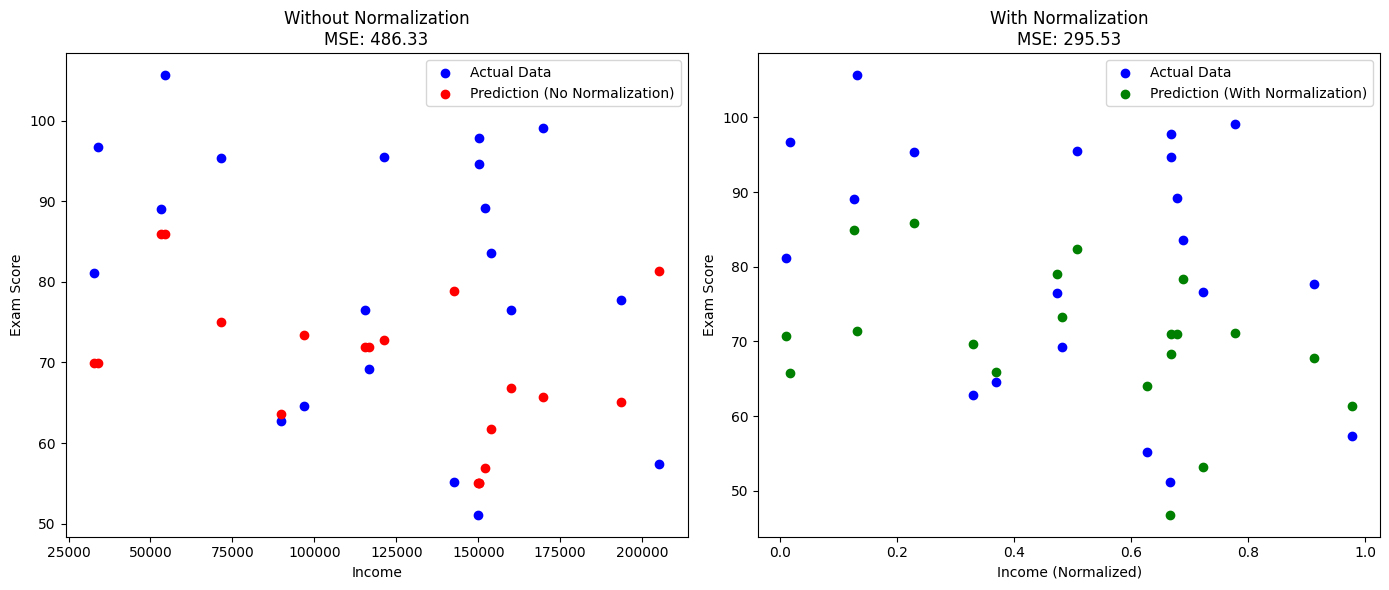

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# สร้างข้อมูลตัวอย่างที่มี Noise
np.random.seed(42)
data = {
    'Income': np.random.randint(30000, 210000, 100), # รายได้
    'Age': np.random.randint(18, 60, 100),  # อายุ
    'Exam Score': np.random.randint(50, 100, 100) + np.random.normal(0, 10, 100) # คะแนนสอบ
}
df = pd.DataFrame(data)

# แบ่งข้อมูลเป็นฟีเจอร์และตัวแปรเป้าหมาย
X = df[['Income', 'Age']]
y = df['Exam Score']

# แบ่งข้อมูลเป็นชุดฝึกและทดสอบ
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# โมเดล KNN สำหรับกรณีไม่ทำ Normalization
knn_no_norm = KNeighborsRegressor(n_neighbors=5)
knn_no_norm.fit(X_train, y_train)
predicted_no_norm = knn_no_norm.predict(X_test)

# ทำ Normalization ข้อมูล
scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

# โมเดล KNN สำหรับกรณีทำ Normalization
knn_norm = KNeighborsRegressor(n_neighbors=5)
knn_norm.fit(X_train_normalized, y_train)
predicted_norm = knn_norm.predict(X_test_normalized)

# คำนวณ Mean Squared Error (MSE) สำหรับทั้งสองกรณี
mse_no_norm = mean_squared_error(y_test, predicted_no_norm)
mse_norm = mean_squared_error(y_test, predicted_norm)

# แสดงผลการเปรียบเทียบ MSE
print(f'Mean Squared Error (Without Normalization): {mse_no_norm:.2f}')
print(f'Mean Squared Error (With Normalization): {mse_norm:.2f}')

# สร้างกราฟเปรียบเทียบ
plt.figure(figsize=(14, 6))

# กราฟสำหรับไม่ทำ Normalization
plt.subplot(1, 2, 1)
plt.scatter(X_test['Income'], y_test, color='blue', label='Actual Data')
plt.scatter(X_test['Income'], predicted_no_norm, color='red', label='Prediction (No Normalization)')
plt.xlabel('Income')
plt.ylabel('Exam Score')
plt.title(f'Without Normalization\nMSE: {mse_no_norm:.2f}')
plt.legend()

# กราฟสำหรับทำ Normalization
plt.subplot(1, 2, 2)
plt.scatter(X_test_normalized[:, 0], y_test, color='blue', label='Actual Data')
plt.scatter(X_test_normalized[:, 0], predicted_norm, color='green', label='Prediction (With Normalization)')
plt.xlabel('Income (Normalized)')
plt.ylabel('Exam Score')
plt.title(f'With Normalization\nMSE: {mse_norm:.2f}')
plt.legend()

plt.tight_layout()
plt.show()


Predictions for new data (Without Normalization): [69.92737197 81.32165054 78.33641211 79.42886542]
Predictions for new data (With Normalization): [73.41919624 69.0082921  65.75248823 73.41919624]


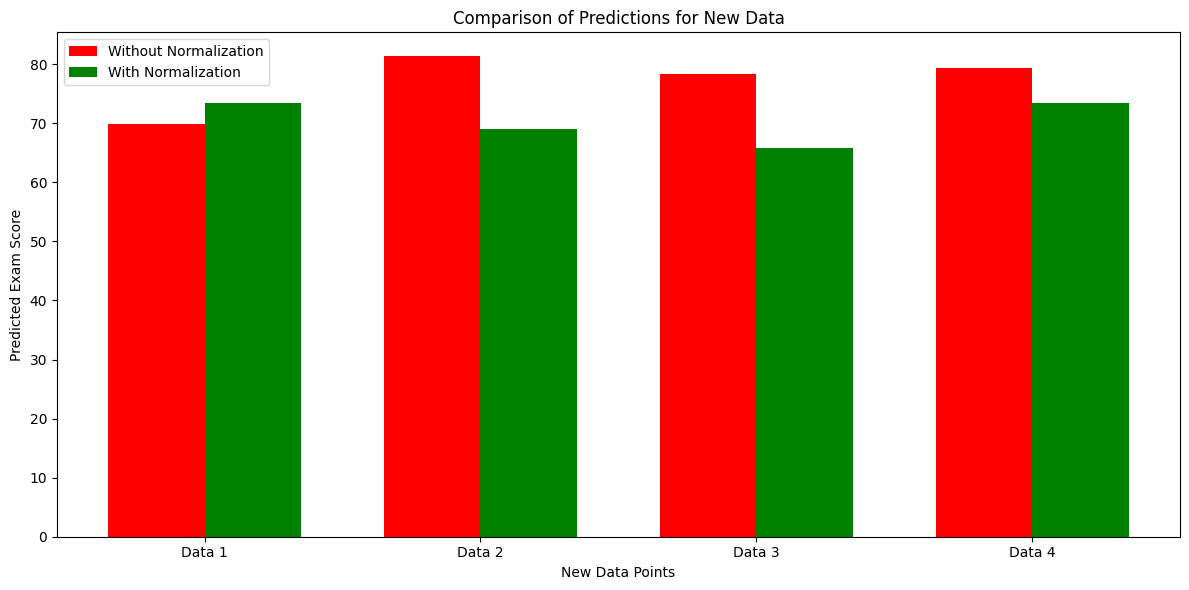

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# สร้างข้อมูลตัวอย่างที่มี Noise
np.random.seed(42)
data = {
    'Income': np.random.randint(30000, 210000, 100), # รายได้
    'Age': np.random.randint(18, 60, 100),  # อายุ
    'Exam Score': np.random.randint(50, 100, 100) + np.random.normal(0, 10, 100) # คะแนนสอบ
}
df = pd.DataFrame(data)

# แบ่งข้อมูลเป็นฟีเจอร์และตัวแปรเป้าหมาย
X = df[['Income', 'Age']]
y = df['Exam Score']

# แบ่งข้อมูลเป็นชุดฝึกและทดสอบ
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# โมเดล KNN สำหรับกรณีไม่ทำ Normalization
knn_no_norm = KNeighborsRegressor(n_neighbors=5)
knn_no_norm.fit(X_train, y_train)

# ทำ Normalization ข้อมูล
scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

# โมเดล KNN สำหรับกรณีทำ Normalization
knn_norm = KNeighborsRegressor(n_neighbors=5)
knn_norm.fit(X_train_normalized, y_train)

# สร้างข้อมูลใหม่เพื่อทดสอบโมเดล
new_data = pd.DataFrame({
    'Income': [25000, 60000, 180000, 50000],
    'Age': [20, 35, 50, 23]
})

# ทำนายข้อมูลใหม่ด้วยโมเดลที่ไม่ทำ Normalization
predicted_no_norm_new = knn_no_norm.predict(new_data)

# ทำ Normalization ข้อมูลใหม่
new_data_normalized = scaler.transform(new_data)

# ทำนายข้อมูลใหม่ด้วยโมเดลที่ทำ Normalization
predicted_norm_new = knn_norm.predict(new_data_normalized)

# แสดงผลลัพธ์
print("Predictions for new data (Without Normalization):", predicted_no_norm_new)
print("Predictions for new data (With Normalization):", predicted_norm_new)

# แสดงผลการเปรียบเทียบกราฟ
plt.figure(figsize=(12, 6))
bar_width = 0.35
index = np.arange(len(new_data))

# กราฟเปรียบเทียบผลลัพธ์การทำนาย
plt.bar(index, predicted_no_norm_new, bar_width, label='Without Normalization', color='red')
plt.bar(index + bar_width, predicted_norm_new, bar_width, label='With Normalization', color='green')

plt.xlabel('New Data Points')
plt.ylabel('Predicted Exam Score')
plt.title('Comparison of Predictions for New Data')
plt.xticks(index + bar_width / 2, ['Data 1', 'Data 2', 'Data 3', 'Data 4'])
plt.legend()

plt.tight_layout()
plt.show()
